In [1]:
# imports and setup 
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [3]:
df1 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/Nation_HealthSurvey_Variables.csv")

df2 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANHospitals.csv")

df3 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANpopulation_and_population_density_USA.csv")

df4 = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/usaCLEANCDRData.csv")

states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df4["Province/State"] = df4["Province/State"].replace(abb[x], states[x])
        
df4 = df4[df4["Last Update"] == "04/01/2020"]
groupData = df4.groupby("Province/State")
df4 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State"})
df1 = df1.set_index('Province/State')
df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')
df4 = df4.rename(columns = {"Deaths": "COVID Deaths"})
df4 = df4[["COVID Deaths"]]
df4

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df4], axis = 1, sort = False)

df.dtypes

Deaths                                         float64
Years of Potential Life Lost Rate              float64
Average Number of Physically Unhealthy Days    float64
Average Number of Mentally Unhealthy Days      float64
% Smokers                                        int64
% Adults with Obesity                            int64
Food Environment Index                         float64
% Physically Inactive                            int64
% With Access to Exercise Opportunities        float64
Chlamydia Rate                                 float64
% Uninsured                                    float64
# Primary Care Physicians                      float64
Primary Care Physicians Rate                   float64
Preventable Hospitalization Rate               float64
% Vaccinated                                   float64
High School Graduation Rate                    float64
% Some College                                   int64
% Unemployed                                   float64
% Children

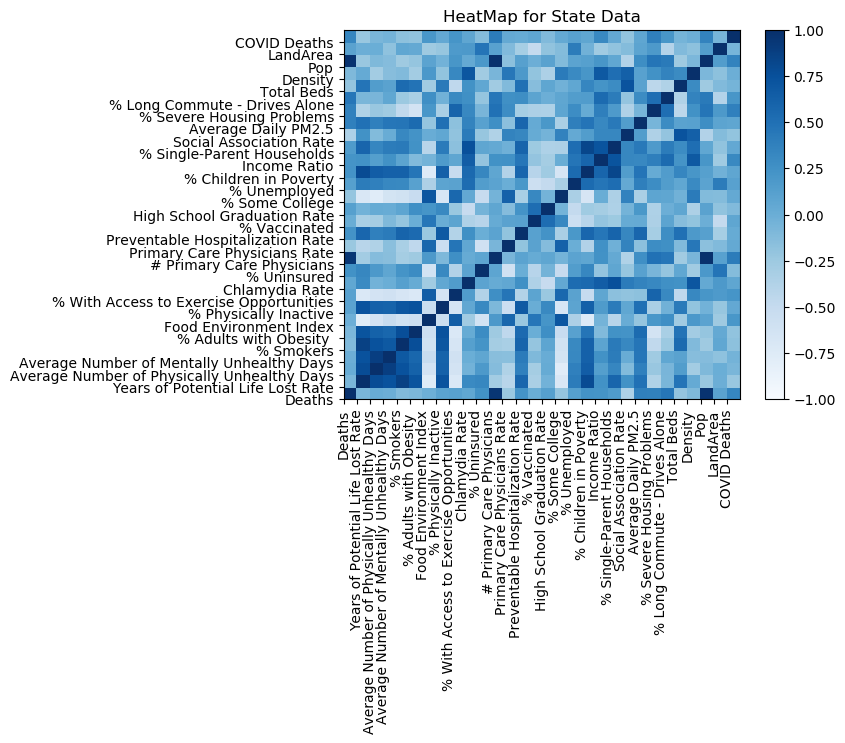

In [5]:
corr_m = df.corr()
plt.style.use('default')
heatmap = plt.pcolor(corr_m, vmin = -1, vmax = 1, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

plt.xticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', '# Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'COVID Deaths'], rotation = 90)
plt.yticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', '# Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'COVID Deaths'], rotation = 0)

plt.title("HeatMap for State Data")
print()

In [6]:
corr_m["% Smokers"]

Deaths                                        -0.104244
Years of Potential Life Lost Rate              0.872402
Average Number of Physically Unhealthy Days    0.739654
Average Number of Mentally Unhealthy Days      0.686057
% Smokers                                      1.000000
% Adults with Obesity                          0.768940
Food Environment Index                        -0.603192
% Physically Inactive                          0.704300
% With Access to Exercise Opportunities       -0.662217
Chlamydia Rate                                 0.126610
% Uninsured                                    0.232123
# Primary Care Physicians                     -0.294077
Primary Care Physicians Rate                  -0.313215
Preventable Hospitalization Rate               0.600545
% Vaccinated                                  -0.207241
High School Graduation Rate                    0.084199
% Some College                                -0.606734
% Unemployed                                   0

Food Environment Index, Percent of People With Access to Exercise Opportunities, Number of Primary Care Physicians, Income Ratio, Percent of People with Severe Housing Problems, Population, and percent of people with long commutes of driving alone were the variables that had over 0.20 correlation with the COVID Deaths variable. Percent of vaccinated persons, average daily PM2.5, total beds, population density, and percent of physically inactive people were variables that had correlation value of near 0. Years of Potential Life Lost Rate, Average Number of Physically Unhealthy Days, Average Number of Mentally Unhealthy Days, Percentage of Smokers, and Percentage of Adult Obesity, and physically inactive variables have a large correlation to one another. 

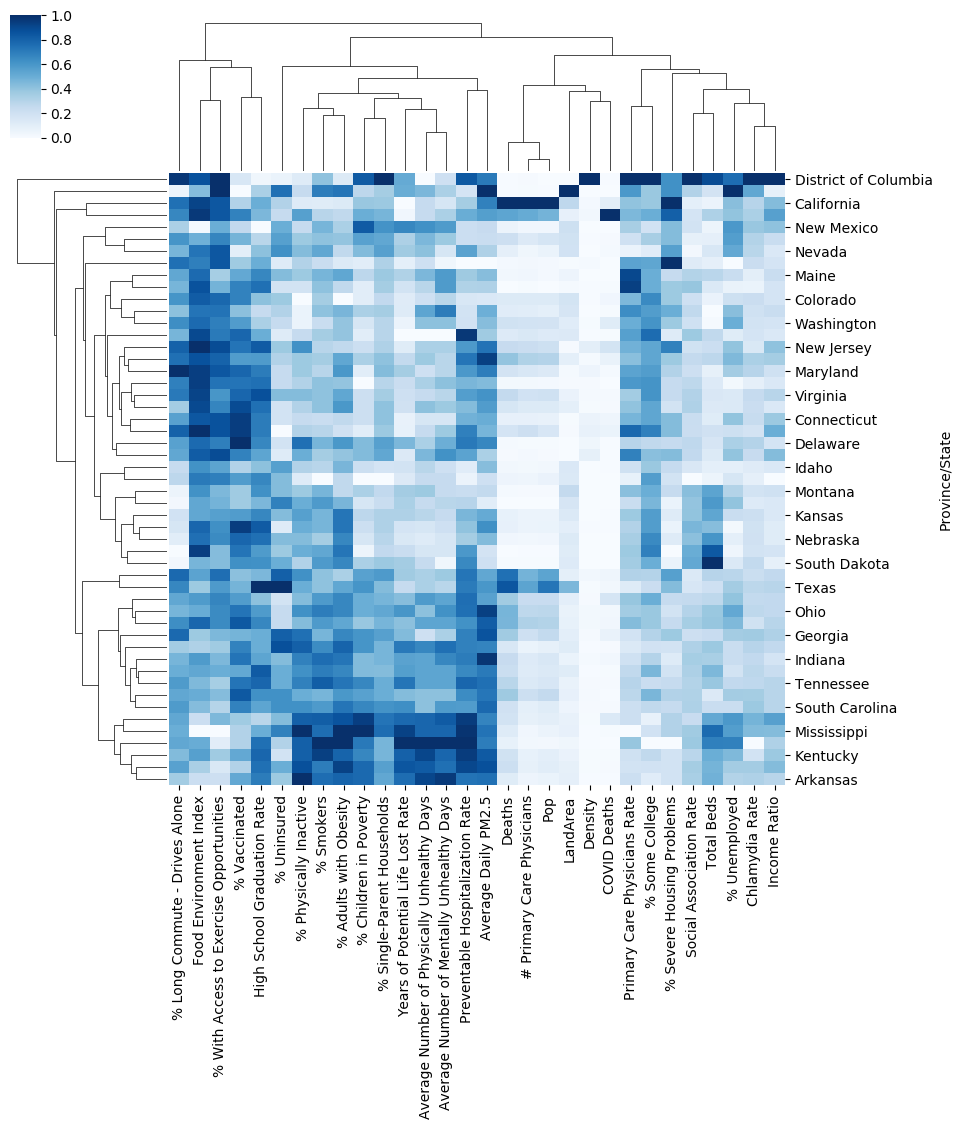

In [7]:
g = sns.clustermap(df, method="average", metric="euclidean", cmap="Blues", standard_scale = 1)

The closest varibales are the the number of primary care physicians and population of a state. Overall, the dendrogram clustered heat map shows that the variables in question are not close to one another. In general, the clusters start higher up in the dendrogram. The same trend is observed between the states. 

PCA ANALYSIS:
The PCA analysis is performed in order to reduce the number of variables, while maintaing a majority of the information presented by the variables. 

In [9]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(30):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

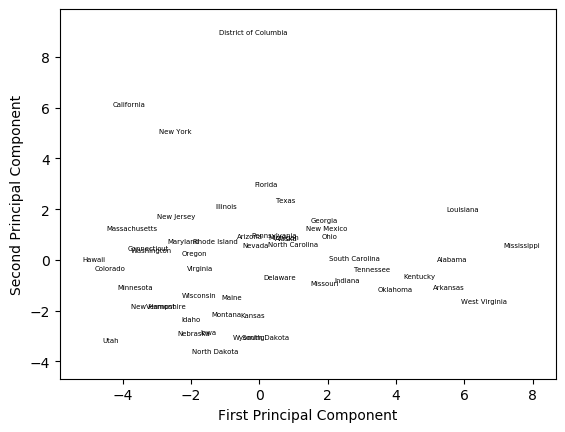

In [10]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(df.index.values):
    ax1.annotate(df.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

[3.03823354e-01 1.79038341e-01 1.40964156e-01 1.06214863e-01
 6.08674411e-02 4.13039477e-02 3.39734843e-02 2.62285362e-02
 1.90604529e-02 1.56429700e-02 1.12519021e-02 1.09515075e-02
 9.34637587e-03 6.87606031e-03 5.96308302e-03 5.11764923e-03
 4.45872457e-03 3.86625946e-03 3.26196339e-03 2.18695458e-03
 2.12053529e-03 1.96870228e-03 1.56777090e-03 1.05421078e-03
 9.31752914e-04 7.35756672e-04 5.50261943e-04 3.78824718e-04
 2.64114671e-04 3.00427211e-05]


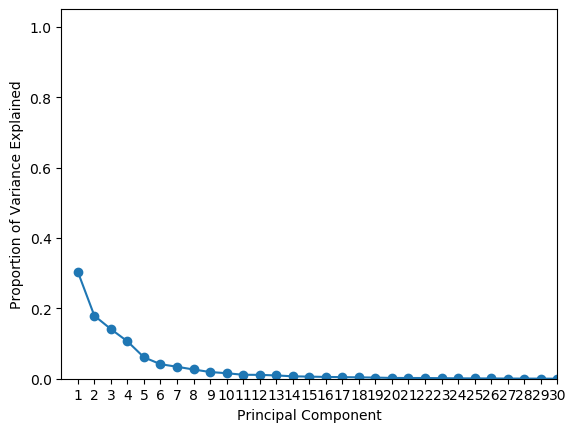

In [12]:
# Variance ratio of the 29 principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

pca_vals =  np.array([i+1 for i in range(30)])
pca_vals
plt.plot(pca_vals, var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0,4.25)
plt.ylim(0,1.05)
plt.xticks(pca_vals)
plt.show()

48.2% of the variance is explained by the first two principal components. The first four principal components account for above 10% of the variance. The PCA indicates that variance is spread fairly evenly between mutiple dimensions in the data space. There is a possibility that some of the variables explored do not have a large relationship to COVID-19 Deaths and are distorting the PCA analysis. Additionally, there are multiple variables that have large correlations to each other. This may affect the overall PCA analysis. 
Therefore, the correlation matrix between COVID-19 Deaths and the variables will be used to eliminate some of the variables that do not have a relationship with COVID-19 Deaths. This is an attempt to improve the variance that the first two PCA principles can account for. 

In [13]:
corr_m["COVID Deaths"]

Deaths                                         0.342895
Years of Potential Life Lost Rate             -0.220511
Average Number of Physically Unhealthy Days   -0.076943
Average Number of Mentally Unhealthy Days     -0.040160
% Smokers                                     -0.169920
% Adults with Obesity                         -0.183376
Food Environment Index                         0.207637
% Physically Inactive                          0.052733
% With Access to Exercise Opportunities        0.219888
Chlamydia Rate                                 0.071395
% Uninsured                                   -0.121862
# Primary Care Physicians                      0.421643
Primary Care Physicians Rate                   0.040942
Preventable Hospitalization Rate               0.027225
% Vaccinated                                   0.074335
High School Graduation Rate                   -0.108784
% Some College                                 0.040842
% Unemployed                                   0

Deaths, Food Environment Index, Percent of People With Access to Exercise Opportunities, Number of Primary Care Physicians, Income Ratio, Percent of People with Severe Housing Problems, Population, and percent of people with long commutes of driving alone were the variables that had over 0.20 correlation with the COVID Deaths variable.

In [14]:
df2 = df[["Deaths","Food Environment Index", "% With Access to Exercise Opportunities",
         "# Primary Care Physicians", "Income Ratio", "% Severe Housing Problems","Pop",
         "% Long Commute - Drives Alone", "COVID Deaths"]]
df2

,Deaths,Food Environment Index,% With Access to Exercise Opportunities,# Primary Care Physicians,Income Ratio,% Severe Housing Problems,Pop,% Long Commute - Drives Alone,COVID Deaths
Province/State,,,,,,,,,
Alabama,81791.0,5.8,61.0,3160.0,5.3,14,4908621,34.0,27.0
Alaska,8336.0,6.3,100.0,673.0,4.1,21,734002,16.0,3.0
Arizona,80394.0,6.6,85.0,4663.0,4.6,18,7378494,36.0,29.0
Arkansas,48017.0,5.2,64.0,2000.0,4.8,14,3038999,27.0,10.0
California,347916.0,8.9,93.0,31343.0,5.3,27,39937489,41.0,199.0
Colorado,52817.0,8.4,90.0,4598.0,4.4,17,5845526,36.0,69.0
Connecticut,35163.0,8.5,94.0,2985.0,5.1,18,3563077,34.0,85.0
Delaware,12674.0,8.1,86.0,691.0,4.4,15,982895,34.0,11.0
District of Columbia,8387.0,8.6,100.0,815.0,7.2,21,720687,49.0,9.0


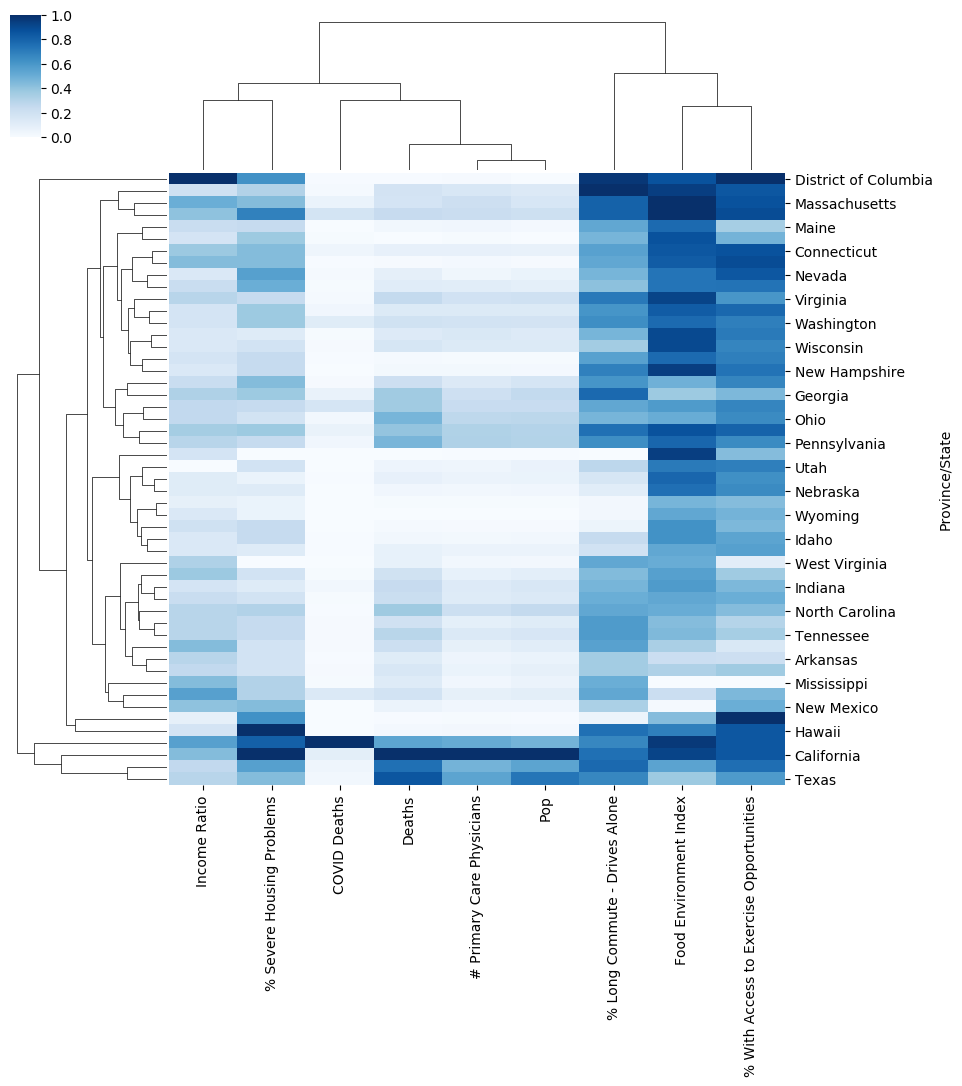

In [15]:
g = sns.clustermap(df2, method="average", metric="euclidean", cmap="Blues", standard_scale = 1)

The closest varibales are the the number of primary care physicians and population of a state. The number of deaths from other causes is closesly related to the the number of primary care physicians and population of a state cluster. The other variables are dissimilar to each other and cluster higher in the dendrogram. The states have become slightly more similar after the removal of the variables. 

In [17]:
scaled = scale(df2)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(9):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)
df_pca.head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-0.835781,1.889453,1.562160,-0.114447,-0.552103,-0.064628,0.330176,-0.086180,-0.025602
1,-1.262838,-1.303318,-0.856181,0.490601,2.826388,0.378609,-0.411114,-0.031599,-0.069579
2,0.260962,0.067580,0.141326,-0.456647,0.687007,-0.465500,-0.323371,0.070364,0.066639
3,-1.729208,1.810901,0.872876,0.214549,0.248520,-0.162282,0.127389,0.116898,-0.023700
4,7.858714,1.542140,-1.774570,-0.939791,0.775141,1.080881,1.334513,0.398674,-0.051306
5,0.195177,-1.135227,-0.559430,-0.332042,-0.050076,-0.417253,-0.133771,0.136181,0.039693
6,0.262891,-1.684693,0.450613,-0.152859,0.087265,0.462741,-0.127578,-0.012666,0.030321
7,-1.097146,-1.147819,-0.194276,-0.275871,-0.255944,-0.434355,-0.231096,0.077958,0.051624
8,1.604054,-2.802727,4.159672,-1.108041,-0.366881,1.681822,-0.218444,-0.062947,0.105198
9,3.664385,1.370315,-0.894914,-0.987970,0.547909,-0.216071,-0.435380,-0.315163,-0.079873


[0.46218013 0.19043758 0.13328388 0.08937296 0.06677707 0.03548083
 0.01967418 0.00208413 0.00070925]


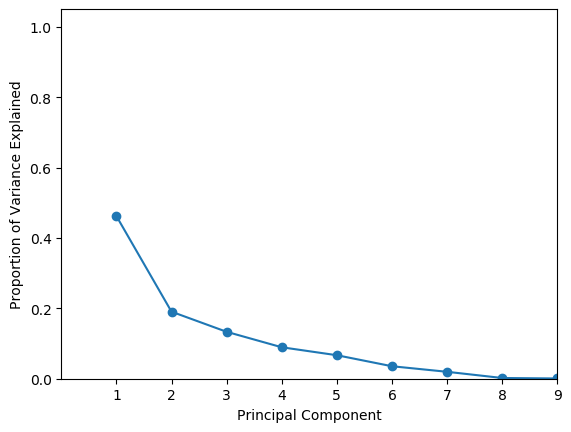

In [19]:
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

pca_vals =  np.array([i+1 for i in range(9)])
pca_vals
plt.plot(pca_vals, var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0,4.25)
plt.ylim(0,1.05)
plt.xticks(pca_vals)
plt.show()

Over 65% of the variance is captured by the first two components in the analysis. This is a large improvement from the previous data set. Nearly 78% of the variance is captured in the the first three components in the analysis. 

PCA analysis is performed on the highly correlated variables. 

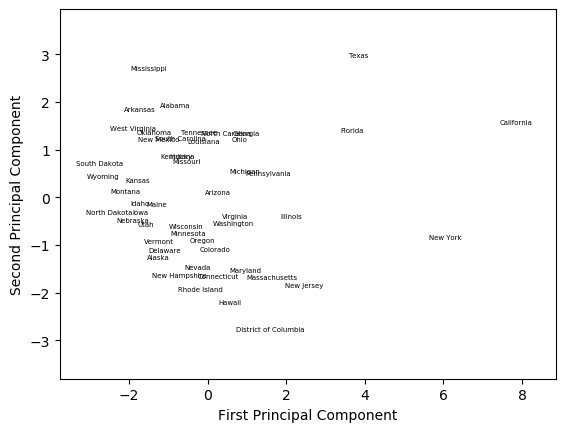

In [20]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

K-Means clustering is performed on the highly correlated variables. This is performed in order to determine related groups of states within the data. 

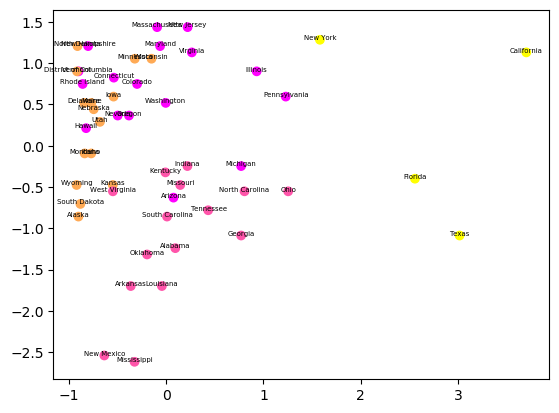

In [22]:
fig,ax1 = plt.subplots()

scaled = scale(df2)

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c=y_pred, cmap = 'spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (scaled[i, 0], scaled[i, 1]), ha='center',fontsize=5)

plt.show()

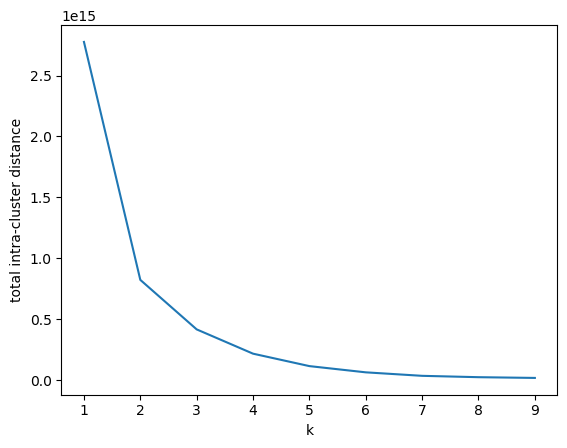

In [23]:
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(df2)
    scores.append(-model.score(df2))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

K-means clustering is sensitive to the value of k. The best k will find group the data points as efficiently as possible.  The total intra-cluster distance is used to determine the best k value in the analysis. The intra-cluster distance is large until k = 4. After k = 4, the intra-cluster distance tapers off. Therefore, K=4 is the best k. 

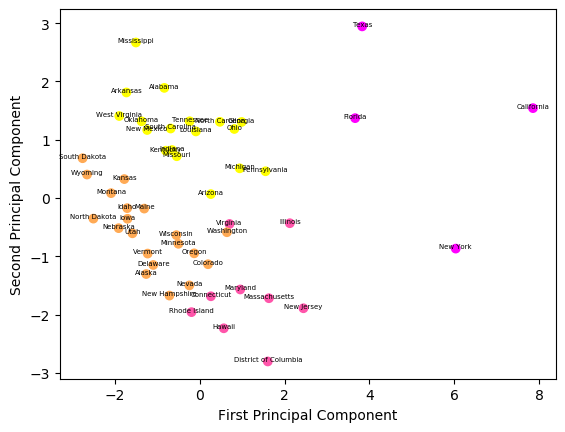

In [35]:
scaled = scale(df2)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(9):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

fig,ax1 = plt.subplots()

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(df_pca)
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred, cmap = 'spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

Agglomerative Hierarchical Clustering is another method of clustering data. In this clustering method, each state is its own cluster. Pairs of states are merged into a cluster as the method moves up the hieracrchy. 

In [28]:
from scipy.cluster import hierarchy

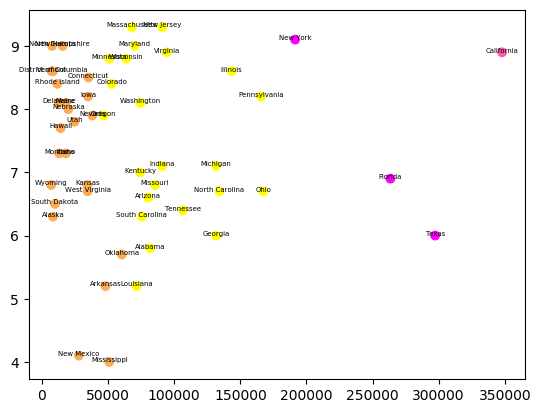

In [29]:
Z = hierarchy.linkage(df2, 'ward') # generate the linkage array

fig,ax1 = plt.subplots()

y_pred = hierarchy.fcluster(Z=Z, t=4, criterion='maxclust')
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=y_pred,  marker="o", cmap='spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (df2.iloc[i, 0], df2.iloc[i, 1]), ha='center',fontsize=5)

plt.show()

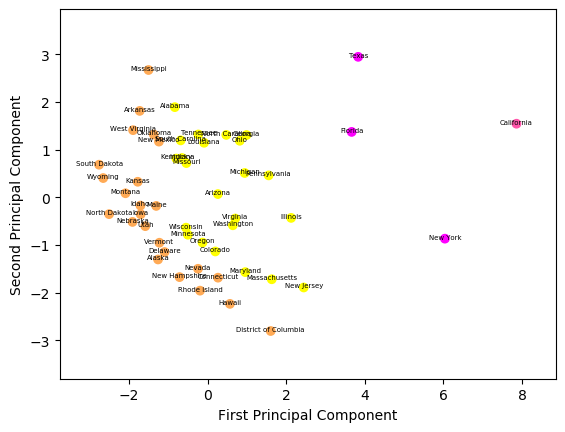

In [32]:
scaled = scale(df2)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(9):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

Z = hierarchy.linkage(df2, 'ward')

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

y_pred = hierarchy.fcluster(Z=Z, t=4, criterion='maxclust')
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred,  marker="o", cmap='spring'); 

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

DBScan is another clustering method used to identify outliers and determine clusters. 

Estimated number of clusters: 4
Estimated number of noise points: 18


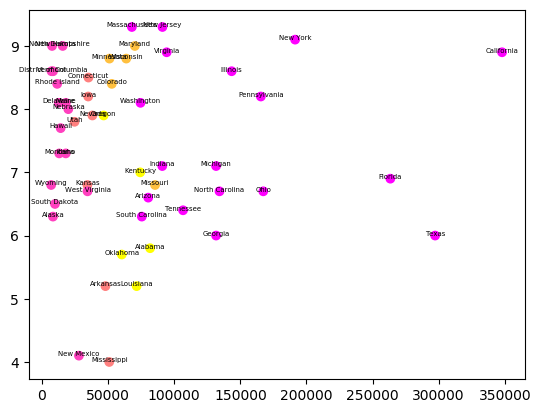

In [33]:
db_model = DBSCAN(eps=369000, min_samples=4)
db_model.fit(df2)
y_pred = db_model.fit_predict(df2)

fig,ax1 = plt.subplots()

plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=y_pred,  marker="o", cmap= 'spring'); 

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot Principal Components 1, 2, and 3
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (df2.iloc[i,0], df2.iloc[i,1]), ha='center',fontsize=5)

plt.show()

An episilon value of 36900 was chosen in order to have a modest amount of outliers. Four minimum samples were chosen to create a cluster, because this allowed the creation of four clusters. The 4 clusters will allow the a better comparison between the k-means clustering and the heirarchial clustering.  

Estimated number of clusters: 4
Estimated number of noise points: 24


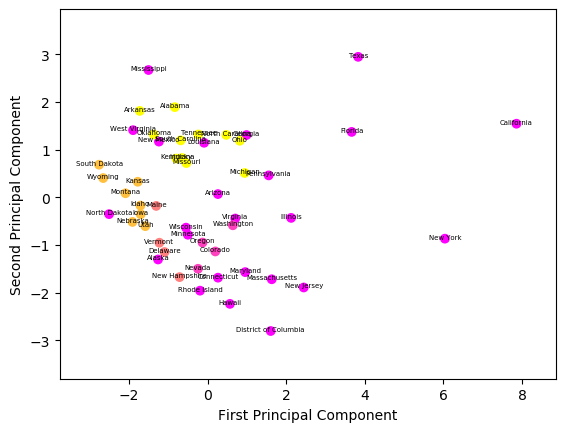

In [34]:
scaled = scale(df2)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(9):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

db_model = DBSCAN(eps=1.3, min_samples=3)
db_model.fit(df_pca)
y_pred = db_model.fit_predict(df_pca)

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred,  marker="o", cmap= 'spring'); 

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

An episilon value of 1.3 was chosen in order to have a modest amount of outliers. Four minimum samples were chosen to create a cluster, because this allowed the creation of four clusters. The 4 clusters will allow the a better comparison between the k-means clustering and the heirarchial clustering.

After performing three different clusters, one group of states continuously found themselves in the same cluster. Wyoming, Utah, South Dakota, Nebraska, and Idaho were in the same cluster for all three methods. These five states are in the bottom 14 for deaths as of April 21, 2020. New York, Florida, and Texas were in a cluster for multiple methods. However, all three were classified as outliers by the DBScan. Illinois, Washington, Virginia, and Maryland were in the same cluster for K-means and Agglomerative Hierarchical Clustering. Only Washington was not classified an outlier by the DBScan. Ohio and Michigan are consistently in the same cluster. Ohio and Michigan are in the top 15 for deaths. 

A 3 Dimensional PCA analysis was performed with the K-Means, Agglomerative Hierarchical Clustering, and DBScan. 

In [23]:
from mpl_toolkits.mplot3d import axes3d

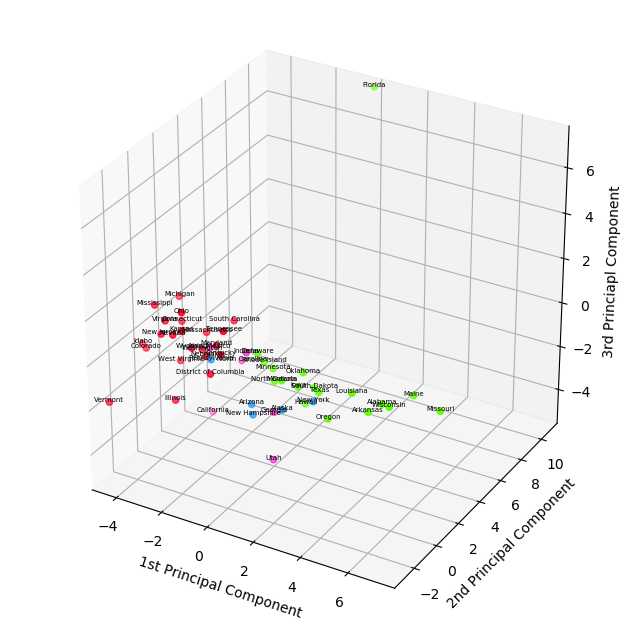

In [24]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(29):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlim(X_PCA[:,0].min(),X_PCA[:,0].max())
ax1.set_ylim(X_PCA[:,1].min(),X_PCA[:,1].max())
ax1.set_zlim(X_PCA[:,2].min(),X_PCA[:,2].max())

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(df_pca)
ax1.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:,2], c=y_pred, cmap = 'gist_rainbow');

# Plot Principal Components 1 and 2
for i,name in enumerate(df.index.values):
    ax1.text(X_PCA[i, 0], X_PCA[i, 1], X_PCA[i, 2], states[i], ha='center',fontsize=5)
    
ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')
ax1.set_zlabel('3rd Princiapl Component')

plt.show()

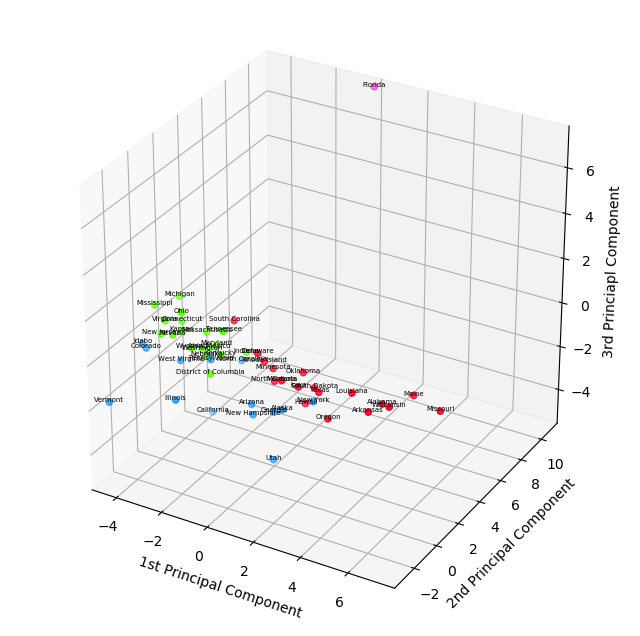

In [25]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(29):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

Z = hierarchy.linkage(df_pca, 'ward') 

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlim(X_PCA[:,0].min(),X_PCA[:,0].max())
ax1.set_ylim(X_PCA[:,1].min(),X_PCA[:,1].max())
ax1.set_zlim(X_PCA[:,2].min(),X_PCA[:,2].max())

y_pred = hierarchy.fcluster(Z=Z, t=4, criterion='maxclust')
ax1.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:,2], c=y_pred, marker = "o", cmap = 'gist_rainbow');

for i,name in enumerate(df.index.values):
    ax1.text(X_PCA[i, 0], X_PCA[i, 1], X_PCA[i, 2], states[i], ha='center',fontsize=5)
    
ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')
ax1.set_zlabel('3rd Princiapl Component')

plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 8


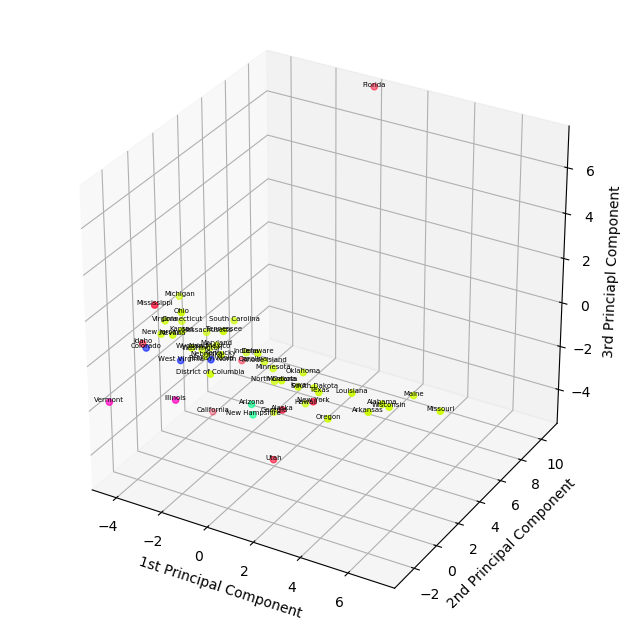

In [26]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(29):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

db_model = DBSCAN(eps=4, min_samples=2)
db_model.fit(df_pca)
y_pred = db_model.fit_predict(df_pca)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlim(X_PCA[:,0].min(),X_PCA[:,0].max())
ax1.set_ylim(X_PCA[:,1].min(),X_PCA[:,1].max())
ax1.set_zlim(X_PCA[:,2].min(),X_PCA[:,2].max())

ax1.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], df_pca.iloc[:,2], c=y_pred,  marker="o", cmap= 'gist_rainbow')

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for i,name in enumerate(df.index.values):
    ax1.text(X_PCA[i, 0], X_PCA[i, 1], X_PCA[i, 2], states[i], ha='center',fontsize=5)
    
ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')
ax1.set_zlabel('3rd Princiapl Component')

plt.show()